In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/usr/local/var/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/var/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def r2_calc(x,y):
    sum_1=0
    sum_2=0
    ave = np.sum(x)/len(x)
    for i in range(0,len(x)):
        sum_1 += (x[i]-y[i])**2
        sum_2 += (x[i]-ave)**2
    
    return 1-sum_1/sum_2


def r_calc(test,pred):
    n=len(test)
    ave_test = np.sum(test)/n
    ave_pred = np.sum(pred)/n
    a=0
    b=0
    c=0
    for i in range(0,len(test)):
        a += (test[i] - ave_test)*(pred[i] - ave_pred)
        b += (test[i] - ave_test)**2
        c += (pred[i] - ave_pred)**2
    
    a2 = a/n
    b2 = (b/n)**0.5
    c2 = (c/n)**0.5
    return a2/(b2*c2)


def prediction(x):
    tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
    
    path = 'New Folder/全体_修正.csv'
    
    with open(path,mode='a') as f:
        data = np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
        feature = data[:,0:x]
        label = data[:,-1]

        scaler = StandardScaler()
        scaler.fit(feature)
        feature = scaler.transform(feature)
        count = 0
        for i in range(10): 
            kf = KFold(n_splits = 5, shuffle = True)
            for train_index, test_index in kf.split(feature):
                train_feature, train_label, test_feature, test_label = np.array(feature)[train_index], np.array(label)[train_index], np.array(feature)[test_index], np.array(label)[test_index]

                grid = GridSearchCV(SVR(),tuned_parameters,cv=5,scoring='r2')
                grid.fit(train_feature,train_label)

                clf = SVR(C=grid.best_params_['C'],kernel='rbf',gamma=grid.best_params_['gamma'],epsilon=0.1)
                clf.fit(train_feature, train_label)
                pred = clf.predict(test_feature)

                if(count==9):
                    f.write(str(r2_score(test_label,pred)))
                else:
                    f.write(str(r2_score(test_label,pred)))
                    f.write(",")
            count += 1
        f.write("\n")
    return 

In [4]:
for i in range(17):
    prediction((i+1)*5)

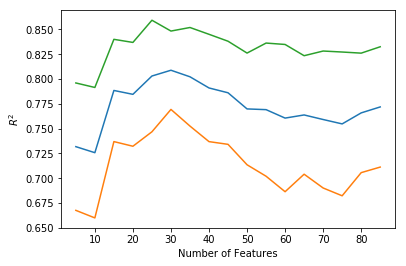

In [14]:
data=np.loadtxt("New Folder/全体_修正.csv",delimiter=",",dtype=float)
ave_feature=np.zeros(17)
ma=np.zeros(17)
mi=np.zeros(17)
std_ = np.zeros(17)
for i in range(17):
    ave_feature[i] = sum(data[i])/len(data[i])
    ma[i]=max(data[i])
    mi[i]=min(data[i])
    std_[i] = np.std(data[i])
    
num = np.array(range(5,90,5))

pdf = PdfPages('New Folder/all_modify2.pdf')
plt.figure()
plt.plot(num,ave_feature)
plt.plot(num,ave_feature-std_)
plt.plot(num,ave_feature+std_)
plt.xlabel("Number of Features")
plt.ylabel("$R^2$")
pdf.savefig()

pdf.close()

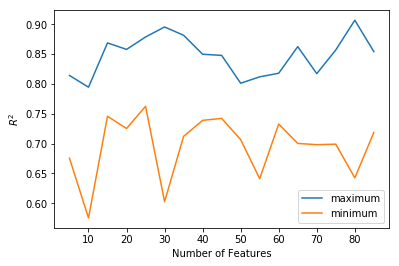

In [3]:
data=np.loadtxt("New Folder/全体.csv",delimiter=",",dtype=float)
ave_feature=np.zeros(17)
ma=np.zeros(17)
mi=np.zeros(17)
std_ = np.zeros(17)
for i in range(17):
    ave_feature[i] = sum(data[i])/len(data[i])
    ma[i]=max(data[i])
    mi[i]=min(data[i])
    std_[i] = np.std(data[i])
    
num = np.array(range(5,90,5))

pdf = PdfPages('New Folder/all_modify4.pdf')
plt.figure()
plt.plot(num,ma,label="maximum")
plt.plot(num,mi,label="minimum")
plt.xlabel("Number of Features")
plt.ylabel("$R^2$")
plt.legend()
pdf.savefig()

pdf.close()

In [2]:
data=np.loadtxt("New Folder/全体_部分1234.csv",delimiter=",",dtype=float)
max_fe=np.zeros(9)
std_fe=np.zeros(9)
for i in range(9):
    max_fe[i] = max(data[i])
    std_fe[i] = np.std(data[i])

In [5]:
data=np.loadtxt("New Folder/全体.csv",delimiter=",",dtype=float)
max_f=np.zeros(17)
std_f=np.zeros(17)
for i in range(17):
    max_f[i] = max(data[i])
    std_f[i] = np.std(data[i])

In [5]:
max_f

array([0.81423859, 0.79460719, 0.868836  , 0.8578881 , 0.87873859,
       0.89547309, 0.88160456, 0.84977919, 0.84790685, 0.80123555,
       0.81194485, 0.81797691, 0.86252333, 0.81732199, 0.85700529,
       0.90677521, 0.85428875])

In [6]:
std_f

array([0.05027037, 0.07435171, 0.04723958, 0.04239581, 0.03908901,
       0.1038718 , 0.06619735, 0.04250992, 0.03380654, 0.03648427,
       0.06111774, 0.03133616, 0.05258697, 0.0438301 , 0.0504389 ,
       0.1001432 , 0.05173439])

In [6]:
max_fe

array([0.86514702, 0.8807467 , 0.83904396, 0.88462632, 0.86095092,
       0.84669072, 0.85177337, 0.84712294, 0.88926059])

In [7]:
std_fe

array([0.03796234, 0.04006194, 0.03595102, 0.09062045, 0.03009222,
       0.04630188, 0.04741979, 0.02473724, 0.06468245])

In [10]:
num=[5,10,15,20,25,26,27,28,29,30,31,32,33,34,35,40,45,50,55,60,65,70,75,80,85]

In [8]:
std=np.array([0.05027037, 0.07435171, 0.04723958, 0.04239581, 0.03908901,
              0.03796234, 0.04006194, 0.03595102, 0.09062045, 0.1038718,
       0.04630188, 0.04741979, 0.02473724, 0.06468245,
       0.06619735, 0.04250992, 0.03380654, 0.03648427,
       0.06111774, 0.03133616, 0.05258697, 0.0438301 , 0.0504389 ,
       0.1001432 , 0.05173439])

In [9]:
max_f=np.array([0.81423859, 0.79460719, 0.868836  , 0.8578881 , 0.87873859,0.86514702, 0.8807467 , 0.83904396, 0.88462632, 0.89547309,
       0.84669072, 0.85177337, 0.84712294, 0.88926059
       , 0.88160456, 0.84977919, 0.84790685, 0.80123555,
       0.81194485, 0.81797691, 0.86252333, 0.81732199, 0.85700529,
       0.90677521, 0.85428875])

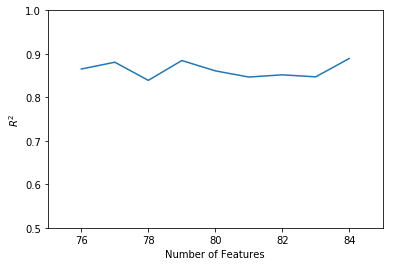

In [10]:
ind=[76,77,78,79,80,81,82,83,84,]
pdf = PdfPages('New Folder/all_一部.pdf')

plt.figure()
plt.plot(ind,max_fe)
plt.xlim(75, 85)
plt.ylim(0.5, 1)
plt.xlabel('Number of Features')
plt.ylabel('$R^2$')
plt.plot()
pdf.savefig()

pdf.close()

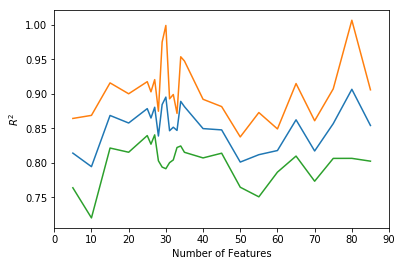

In [12]:
pdf = PdfPages('New Folder/all.pdf')


plt.figure()
plt.plot(num,max_f)
plt.plot(num,max_f+std)
plt.plot(num,max_f-std)
plt.xlim(0, 90)


plt.xlabel('Number of Features')
plt.ylabel('$R^2$')
plt.plot()
pdf.savefig()

pdf.close()

In [297]:
train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:81]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:81]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

In [298]:
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]

In [299]:
grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)
print(grid.best_params_)

{'C': 8, 'gamma': 0.015625, 'kernel': 'rbf'}


In [15]:
reg=SVR(C=grid.best_params_['C'],kernel="rbf",gamma=grid.best_params_['gamma'])
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)

In [20]:
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

パラメータ: rbf, C 8.000000, gamma 0.007812
SVR: r2 -0.706352, RMSE 1.175397, r 0.432277


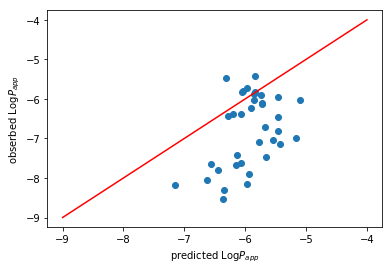

In [21]:
pdf = PdfPages('New Folder/全体.pdf')

plt.figure()
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="r")      


y1 = pred
y2 = test_label
plt.scatter(y1,y2)

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()


pdf.savefig()

pdf.close()


print("パラメータ: rbf, C %f, gamma %f"%(grid.best_params_['C'],grid.best_params_['gamma']))
print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

# heatmap作成

In [27]:
grid.grid_scores_[15]

mean: 0.12993, std: 0.12918, params: {'C': 0.125, 'gamma': 0.001953125, 'kernel': 'rbf'}

In [24]:
lst=np.zeros(154)
for i in range(154):
    lst[i] = grid.grid_scores_[i+14][1]

In [25]:
matrix= np.zeros((11,14))
for i in range(154):
    matrix[i%11][int(i/11)]=lst[i]

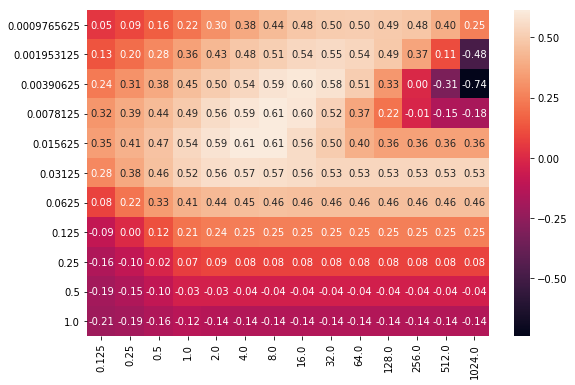

In [31]:
df = pd.DataFrame(data=matrix, index=[2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ], columns=[2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10])

pdf = PdfPages('New Folder/全体_グリッド.pdf')
plt.figure(figsize=(9, 6))
plt.xlabel("C")
plt.ylabel("gamma")
sns.heatmap(df,annot=True,fmt='.2f')
#plt.savefig('grid.png')
pdf.savefig()
pdf.close()

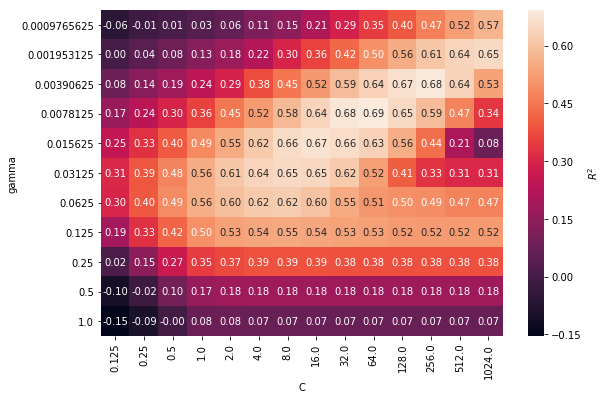

In [18]:
CV=grid.grid_scores_[14:]
heat=[]
for i in range(len(CV)):
    if("kernel" in CV[i][0].keys()):
        del CV[i][0]['kernel']
    CV[i][0].setdefault('$R^2$', CV[i][1])
    heat.append(CV[i][0])
df=pd.DataFrame(heat)
data = df.pivot(index="gamma", columns="C", values="$R^2$")
plt.figure(figsize=(9, 6))
ax=sns.heatmap(data, annot=True, fmt='.2f')
ax.collections[0].colorbar.set_label("$R^2$")
ax

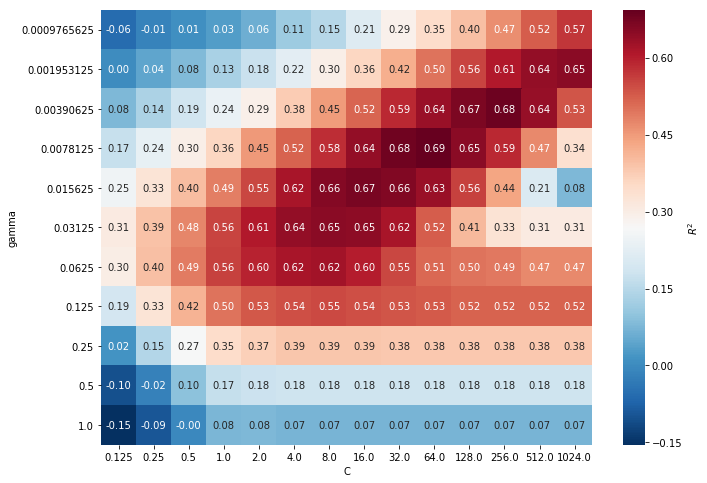

In [19]:
pdf = PdfPages('New Folder/全体_グリッド.pdf')
plt.figure(figsize=(11, 8))
ax=sns.heatmap(data, annot=True, fmt='.2f',cmap="RdBu_r")
ax.collections[0].colorbar.set_label("$R^2$")
pdf.savefig()
pdf.close()

{'C': 8, 'gamma': 0.0078125, 'kernel': 'rbf'}
SVR: r2 -0.706352, RMSE 1.175397, r 0.432277


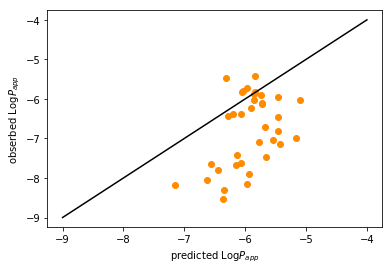

In [16]:
train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:80]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:80]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]
grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)
print(grid.best_params_)
reg=SVR(C=grid.best_params_['C'],kernel="rbf",gamma=grid.best_params_['gamma'])
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

pdf = PdfPages('New Folder/全体_80.pdf')
plt.figure()
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()

pdf.savefig()

pdf.close()

print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

SVR: r2 -0.706352, RMSE 1.175397, r 0.432277


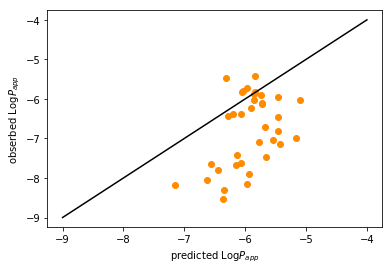

In [4]:
train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:80]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:80]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

reg=SVR(C=8,kernel="rbf",gamma=0.0078125)
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5
pdf = PdfPages('New Folder/全体_80.pdf')
plt.figure()
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()

pdf.savefig()

pdf.close()





print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

In [18]:
from scipy.stats import pearsonr
corelation, pvalue=pearsonr(test_label,pred)
print("相関係数",corelation)
print("p値",pvalue)

相関係数 0.7343365044397466
p値 3.4374378454791496e-07


In [8]:
train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:30]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:30]
test_label=test_data[:,-1]

SVR: r2 0.050519, RMSE 0.876785, r 0.734337


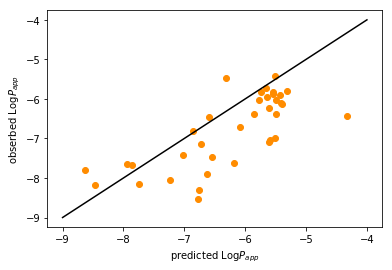

In [9]:
train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:30]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:30]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

reg=SVR(C=64,kernel="rbf",gamma=0.0078125)
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

pdf = PdfPages('New Folder/全体_30.pdf')
plt.figure()
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()

pdf.savefig()

pdf.close()

print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

In [14]:
print(pred[14],test_label[14])
print(pred[25],test_label[25])

-6.083948469257843 -6.72
-5.495017023610911 -6.39


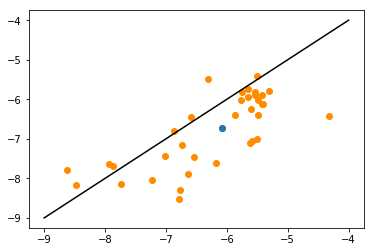

In [15]:
x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black") 

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")





x1=pred[14]
x2=test_label[14]
plt.scatter(x1,x2)

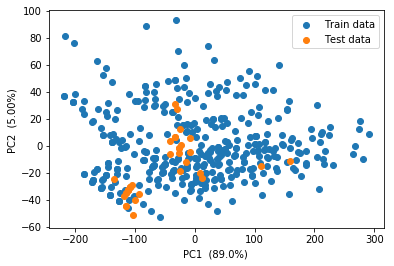

In [4]:
from sklearn.decomposition import PCA

train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:30]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:30]
test_label=test_data[:,-1]


pca = PCA(n_components=2)
pca.fit(train_feature)

Xd = pca.transform(train_feature)
Yd =pca.transform(test_feature)
pdf = PdfPages('New Folder/pca_all.pdf')
plt.figure()

plt.xlabel("PC1  (89.0%) ")
plt.ylabel("PC2  (5.00%) ")
plt.scatter(Xd[:,0],Xd[:,1],label="Train data")
plt.scatter(Yd[:,0],Yd[:,1],label="Test data")

plt.legend()
pdf.savefig()

pdf.close()

In [51]:
assa=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,28]

In [7]:
Yd[26]

array([110.13585712, -14.49080063])

In [41]:
test_label[13]

-5.48

In [42]:
pred[13]

-6.307857820808321

In [20]:
pred

array([-5.30971506, -5.59326653, -5.41748262, -5.39867712, -5.42901765,
       -5.48848587, -5.54091002, -5.53800237, -5.60893962, -5.51077537,
       -5.6458673 , -5.65089902, -5.74680274, -6.30785782, -6.08394847,
       -5.86158574, -5.61656876, -6.76626467, -6.17676222, -6.58800368,
       -6.8612276 , -6.72823651, -5.76984816, -6.54065022, -5.50754066,
       -5.49501702, -4.32223044, -6.63034829, -6.78207678, -7.0191569 ,
       -7.2282951 , -7.93852439, -8.47156661, -8.62912552, -7.86563042,
       -7.74430209])

array([0.78633071, 0.1985158 ])

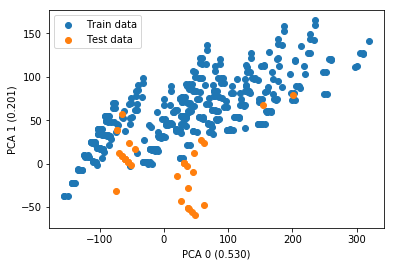

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(test_feature)

Xd = pca.transform(train_feature)
Yd =pca.transform(test_feature)
pdf = PdfPages('New Folder/pca_alladf.pdf')
plt.figure()

plt.xlabel("PCA 0 (0.530)")
plt.ylabel("PCA 1 (0.201)")
plt.scatter(Xd[:,0],Xd[:,1],label="Train data")
plt.scatter(Yd[:,0],Yd[:,1],label="Test data")
plt.legend()
pdf.savefig()

pdf.close()
pca.explained_variance_ratio_

In [219]:
qwe=[]
for i,val in enumerate(train_label):
    if(val<-7):
        qwe.append(i)

In [226]:
ewq=[]
for i,val in enumerate(train_label):
    if(val>-7):
        ewq.append(i)

In [174]:
Xd1 = pd.Series(Xd[:,0])
Xd2 = pd.Series(Xd[:,1])

In [200]:
aswq=[]
for i in range(len(Xd)):
    if(Xd[i][0] < 8.73601134):
        if(2.86375627 < Xd[i][0]):
            if(Xd[i][1] < -1.67688131):
                aswq.append(i)

In [201]:
das=[]
for i in range(len(aswq)):
    das.append(train_label[aswq[i]])

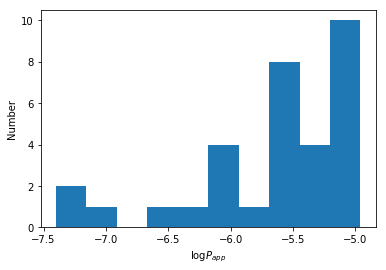

In [310]:
pdf = PdfPages('New Folder/pca_all_log.pdf')
plt.figure()
plt.xlabel("log$P_{app}$")
plt.ylabel("Number")
plt.hist(das)

pdf.savefig()
pdf.close()

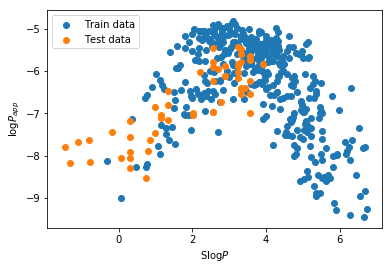

In [120]:
pdf = PdfPages('New Folder/SlogP.pdf')
plt.figure()

fu=pd.read_csv("../furukawa_全体206次元_名前付き.csv")
logp=fu['logPapp']
slogp=fu['SlogP']

wa=pd.read_csv("../wang_全体206次元_名前付き.csv")
logp2=wa['logPapp']
slogp2=wa['SlogP']

plt.xlabel("Slog$P$")
plt.ylabel("log$P_{app}$")
plt.scatter(slogp,logp,label="Train data")
plt.scatter(slogp2,logp2,label="Test data")
plt.legend(loc="upper left")

pdf.savefig()
pdf.close()

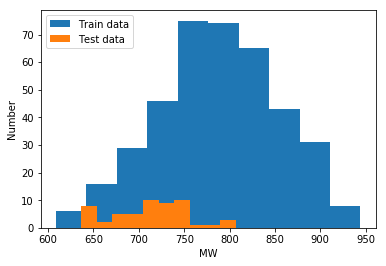

In [119]:
pdf = PdfPages('New Folder/MW.pdf')
plt.figure()

fu=pd.read_csv("../furukawa_全体206次元_名前付き.csv")
mw=fu['Weight']


wa=pd.read_csv("../wang_全体206次元_名前付き.csv")
mw2=wa['Weight']


plt.xlabel("MW")
plt.ylabel("Number")
plt.hist(mw,label="Train data")
plt.hist(mw2,label="Test data")
plt.legend(loc="upper left")

pdf.savefig()
pdf.close()

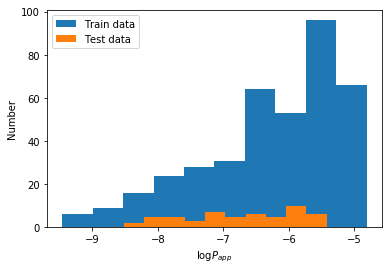

In [212]:
pdf = PdfPages('New Folder/logPapp.pdf')
plt.figure()

fu=pd.read_csv("../furukawa_全体206次元_名前付き.csv")
mw=fu['logPapp']


wa=pd.read_csv("../wang_全体206次元_名前付き.csv")
mw2=wa['logPapp']


plt.xlabel("log$P_{app}$")
plt.ylabel("Number")
plt.hist(mw,label="Train data")
plt.hist(mw2,label="Test data")
plt.legend(loc="upper left")

pdf.savefig()
pdf.close()

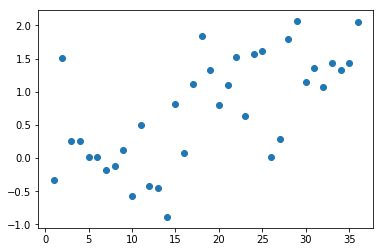

In [140]:
asd=np.zeros(36)
asd=pred-test_label
plt.scatter(np.array(range(1,37)),asd)

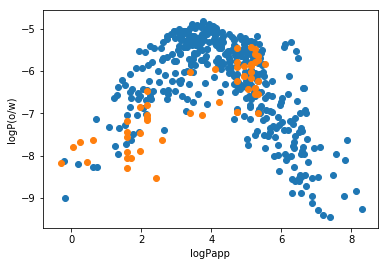

In [148]:
#pdf = PdfPages('New Folder/logPapp.pdf')
#plt.figure()

fu=pd.read_csv("../furukawa_全体206次元_名前付き.csv")
mw=fu['logPapp']
logp=fu['logP(o/w)']

wa=pd.read_csv("../wang_全体206次元_名前付き.csv")
mw2=wa['logPapp']
logp2=wa['logP(o/w)']

plt.ylabel("logP(o/w)")
plt.xlabel("logPapp")
plt.scatter(logp,mw)
plt.scatter(logp2,mw2)




AttributeError: 'numpy.ndarray' object has no attribute 'index'

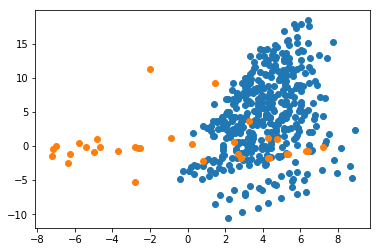

In [210]:
from sklearn.decomposition import PCA



pca = PCA(n_components=2)
pca.fit(test_feature)

Xd = pca.transform(train_feature)
Yd =pca.transform(test_feature)


plt.scatter(Xd[:,0],Xd[:,1])
plt.scatter(Yd[:,0],Yd[:,1])


In [252]:
全=pd.read_csv("../furukawa_全体206次元_名前付き.csv")
残=pd.read_csv("../furukawa_残基毎_206次元_名前付き.csv")
name=np.loadtxt("../特徴量_名前一覧.csv",delimiter=",",dtype=str)

file=open("全体特徴量相関なし.csv","w")
for i in range(206):
    x=全[name[i]]
    y=残[name[i]]
    corelation, pvalue=pearsonr(x,y)
    if(corelation<0.7):
        file.write(name[i])
        file.write("\n")
file.close()

SVR: r2 -0.472666, RMSE 1.091949, r 0.423507


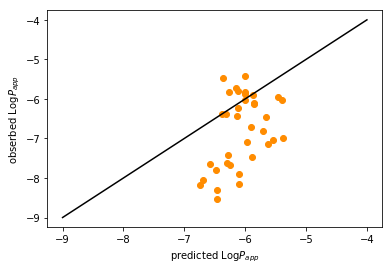

In [4]:
train_data=np.loadtxt("全体FURUKAWA_最後_名前なし.csv",delimiter=",",dtype=float)
train_feature=train_data[:,0:81]
train_label=train_data[:,-1]

test_data=np.loadtxt("全体WANG_最後_名前なし.csv",delimiter=",",dtype=float)
test_feature=test_data[:,0:81]
test_label=test_data[:,-1]

std = StandardScaler()
std.fit(train_feature)
train_feature = std.transform(train_feature)
test_feature = std.transform(test_feature)

reg=SVR(C=8,kernel="rbf",gamma=0.015625)
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5

x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()






print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))

In [25]:
fdata=np.array([[1,1,1,2],[1,1,2,1],[1,2,3,1]])
ldata=np.array([2,1.4,4])

train_feature=fdata[0:-1,:]
train_label=ldata[0:2]


test_feature=fdata[2,:]
test_label=ldata[2]

reg=SVR(C=1,kernel="rbf",gamma=0.1)
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.